In [1]:
import numpy as np
import sys
sys.path.append('../')
from tark import tark, rk, mylstsq

In [2]:
# Set parameters
n = 1000000
d = 25
num_steps = n
burn_in = 1000
num_threads = 10

In [3]:
# Define regression problem
f = lambda y: np.sin(np.pi * y) * np.exp(-2 * y) + np.cos(4 * np.pi * y)
pts = np.linspace(-1,1,num=n)
kk = np.arange(d)
A = np.cos(kk[np.newaxis,:] * np.arccos(pts[:,np.newaxis]))
b = f(pts) + 0.2 * np.random.randn(n)
x = mylstsq(A, b) # true solution
_, S, _ = np.linalg.svd(A, full_matrices=False)
print("Condition number of A is {}".format(max(S)/min(S)))

Condition number of A is 5.618439546276443


In [4]:
# Run RK methods
tark_history = tark(A,b,num_steps=num_steps,burn_in=burn_in,output_history=True)
rk_history = rk(A,b,num_steps=num_steps,output_history=True)
rka_history = rk(A,b,num_steps=num_steps//num_threads,output_history=True,num_threads=num_threads)
rku_history = rk(A,b,num_steps=num_steps,output_history=True,under_relax=lambda t: 1/(t+1)**(1/2))

100%|████████████████████████████████| 1000000/1000000 [00:05<00:00, 171798.81it/s]


In [5]:
# Set up matplotlib
import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern"],
    "text.latex.preamble": r"\usepackage{amsmath}"  # Ensure amsmath is included
})
plt.rcParams.update({'font.size': 16})
rkcolor = "#648FFF"
rkacolor = "#785EF0"
rkucolor = "#DC267F"
tarkcolor = "#FE6100"

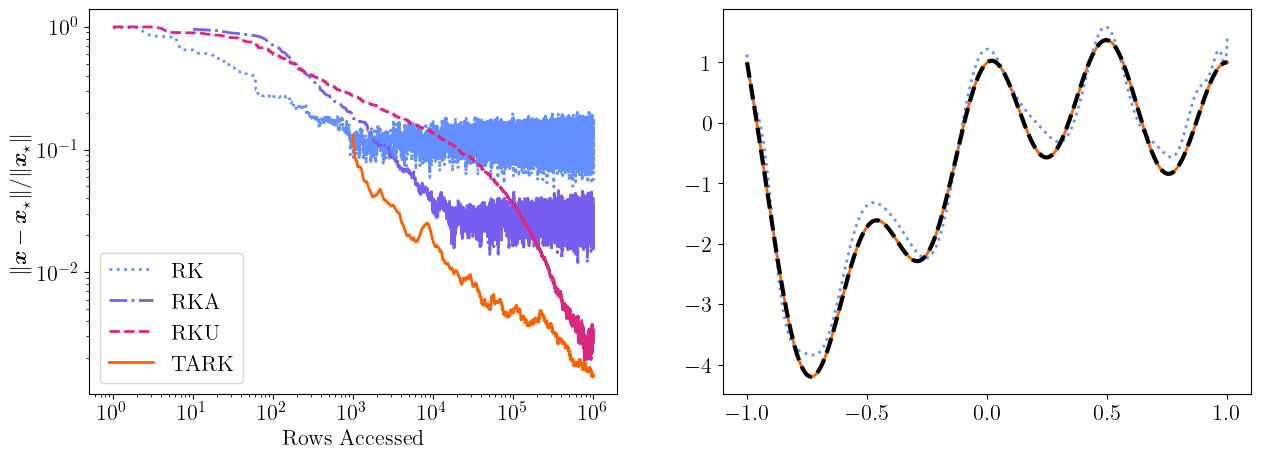

In [6]:
# Generate plots
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize=(15, 5))  # Adjust figsize as needed
ax1.plot(range(1,num_steps+1),[np.linalg.norm(xx - x) / np.linalg.norm(x) for xx in rk_history], label="RK", color=rkcolor, linewidth=2, linestyle="dotted")
ax1.plot(range(num_threads,num_steps+1,num_threads),[np.linalg.norm(xx - x) / np.linalg.norm(x) for xx in rka_history], label="RKA", color=rkacolor, linewidth=2, linestyle="dashdot")
ax1.plot(range(1,num_steps+1),[np.linalg.norm(xx - x) / np.linalg.norm(x) for xx in rku_history], label="RKU", color=rkucolor, linewidth=2, linestyle="dashed")
ax1.plot(range(burn_in+1,num_steps+1),[np.linalg.norm(xx - x) / np.linalg.norm(x) for xx in tark_history[burn_in:]], label="TARK", color=tarkcolor, linewidth=2)
ax1.set_xscale("log")
ax1.set_yscale("log")
ax1.set_xlabel("Rows Accessed")
ax1.set_ylabel(r"$\|\boldsymbol{x}-\boldsymbol{x}_\star\| / \|\boldsymbol{x}_\star\|$")
ax1.legend()

ax2.plot(pts, A @ tark_history[-1], color=tarkcolor, linewidth=2)
ax2.plot(pts, A @ rk_history[-1], color=rkcolor, linewidth=2, linestyle="dotted")
ax2.plot(pts, f(pts), color="black", linestyle="dashed", linewidth=3)